# **Deep Learning Project**
## Name: Purvesh Gandhi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential

In [2]:
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
vgg.trainable = False
for layer in vgg.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [3]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
model = Sequential([
    vgg,
    Dropout(0.2),
    Flatten(),
    BatchNormalization(),
    Dense(1024),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(1024),
    BatchNormalization(),
    Activation('relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [20]:
from tensorflow.keras.applications.vgg16 import preprocess_input

training_dir = "/content/drive/MyDrive/DL_Dataset/chest_xray/train"

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    preprocessing_function=preprocess_input,
                                    validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = (224,224), batch_size = 64, subset='training',class_mode = 'binary')
valid_generator = valid_datagen.flow_from_directory(training_dir, target_size = (224,224), batch_size = 64, subset='validation', class_mode = 'binary')

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
training_generator.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

In [22]:
history = model.fit(training_generator,
                   steps_per_epoch = 4187 // 64,
                   epochs = 10,
                   validation_data=valid_generator,
                   validation_steps= 1045 // 64)

Epoch 1/10
65/65 [==============================] - 100s 2s/step - loss: 0.1215 - accuracy: 0.9580 - val_loss: 0.0705 - val_accuracy: 0.9795
Epoch 2/10
65/65 [==============================] - 80s 1s/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.0439 - val_accuracy: 0.9844
Epoch 3/10
65/65 [==============================] - 80s 1s/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0613 - val_accuracy: 0.9766
Epoch 4/10
65/65 [==============================] - 79s 1s/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0536 - val_accuracy: 0.9824
Epoch 5/10
65/65 [==============================] - 80s 1s/step - loss: 0.0061 - accuracy: 0.9976 - val_loss: 0.0936 - val_accuracy: 0.9775
Epoch 6/10
65/65 [==============================] - 80s 1s/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0668 - val_accuracy: 0.9824
Epoch 7/10
65/65 [==============================] - 79s 1s/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.1010 - val_accuracy: 0.9697
Epoch 8/10
65/65 [=

In [24]:
test_dir = "/content/drive/MyDrive/DL_Dataset/chest_xray/test"

testing_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

test_generator = testing_datagen.flow_from_directory(test_dir, target_size = (224,224), batch_size = 64, class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [26]:
loss, accuracy = model.evaluate(test_generator, steps=624 // 64)

9/9 [==============================] - 8s 871ms/step - loss: 1.3204 - accuracy: 0.8212


In [31]:
print("Accuracy: {:.2f}".format(accuracy*100))

Accuracy: 82.12


In [66]:

test_generator = testing_datagen.flow_from_directory(test_dir, target_size = (224,224), batch_size = 64, class_mode = 'binary',shuffle=False)

Found 624 images belonging to 2 classes.


In [89]:
predictions = model.predict(test_generator, verbose=1)


10/10 [==============================] - 9s 798ms/step


In [90]:
predictions = np.array(predictions) > 0.5
predictions = predictions.reshape((len(predictions)))
predictions = predictions.astype('float32')

In [91]:
y_test = test_generator.classes
y_test = y_test.astype('float32')


In [92]:
from tensorflow.math import confusion_matrix
cm = confusion_matrix(y_test,predictions)

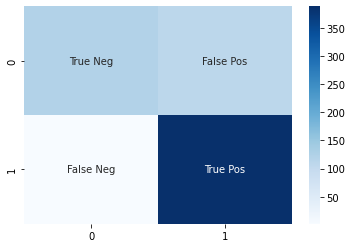

In [93]:
labels = ["True Neg" ,"False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [100]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(test_generator.classes,predictions, average='weighted')
print("Precision: {:.2f}".format(precision) + "\nRecall: {:.2f}".format(recall) + "\nF-Score: {:.2f}".format(fscore))

Precision: 0.85
Recall: 0.82
F-Score: 0.80


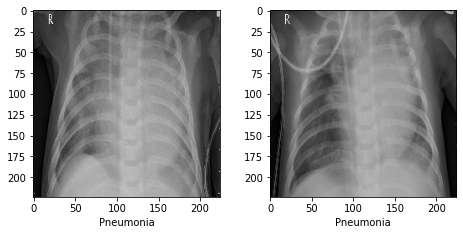

In [134]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from google.colab import files
import cv2
import os

sample_imgs = os.listdir("/content/drive/MyDrive/DL_Dataset/samples")
plt.figure(figsize=(12,24))

i = 1
for im in sample_imgs:
  path = '/content/drive/MyDrive/DL_Dataset/samples/' + im
  loaded_img = load_img(path, target_size=(224, 224))
  my_image = img_to_array(loaded_img)
  my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
  my_image = preprocess_input(my_image)

  prediction = model.predict(my_image)
  if prediction[0][0] == 1:
    lbl = "Pneumonia"
  else:
    lbl = "Healthy"

  plt.subplot(6, 3, i)
  i += 1
  plt.imshow(loaded_img)
  plt.xlabel(lbl)
plt.show()